# Model to Predict Grade Outcome of High School Chemistry Students

## Introduction, Data Cleaning and Preprocessing
In the following notebook, we will examine my students' academic habits and if there is any correlation with their performance in high school general chemistry

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_70084/3408537860.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
grades = pd.read_csv('2nd_semester_checkin.csv')
print('Shape: ',grades.shape)
print('Original columns: ',grades.columns.values)

Shape:  (75, 11)
Original columns:  ['Timestamp'
 'To the best of your knowledge, what was your grade? (positive integer value i.e. 86, 91, etc.) '
 'To the best of your knowledge, how many hours per week did you spend on homework and studying outside of class for this class? (positive integer value i.e. 0, 4, etc.) '
 'How satisfied are you with your performance the previous grading period?'
 'Did you try something new to help improve your grade in chemistry last grading period?'
 'Did you ask the instructor questions when you were uncertain about a topic?'
 'To what extent do you agree with the following statement: "The ticket system encourages me to act differently in chemistry class"'
 'How many students  you typically sit with during lunch/nutrition?'
 'Do you feel that other students at this school respect you?'
 'Anything else I should know to help improve our class?'
 'Song recommendation?']


In [3]:
#dropping columns that were only relevant for emotional wellbeing
grades_int = grades.drop(labels=grades.columns[[0,6,7,8,9,10]],axis=1)
grades_int.head()

,"To the best of your knowledge, what was your grade? (positive integer value i.e. 86, 91, etc.)","To the best of your knowledge, how many hours per week did you spend on homework and studying outside of class for this class? (positive integer value i.e. 0, 4, etc.)",How satisfied are you with your performance the previous grading period?,Did you try something new to help improve your grade in chemistry last grading period?,Did you ask the instructor questions when you were uncertain about a topic?
0,100.0,2.0,4,Yes,Yes
1,99.0,2.0,5,No,Yes
2,94.0,2.0,4,No,No
3,100.0,1.0,5,No,Yes
4,91.0,1.0,5,No,No


In [4]:
grades_list = []

grades_list.append(grades_int.iloc[:,0].astype('int'))
grades_list.append(grades_int.iloc[:,1].astype('int'))
grades_list.append(grades_int.iloc[:,2].astype('int'))
grades_list.append(grades_int.iloc[:,3].map({'Yes':1,'No':0}))
grades_list.append(grades_int.iloc[:,4].map({'Yes':1,'No':0}))

new_col_names = ['Grade','Hours per week on HW & studying for chem', 
                "Satisfaction with semester's performance",'Tried something new to help grade',
                 'Asked clarifying questions']
grades_dict = dict(zip(new_col_names,grades_list))
# grade_df = pd.DataFrame(grade_list,columns=new_col_names)
grade_df = pd.DataFrame(grades_dict)

In [5]:
# #replace upper-end outlier values with mean
grade_df = grade_df[grade_df.iloc[:,1] < 12]
grade_df = grade_df.fillna(grade_df.iloc[:,1].mean())
grade_df.head(3)

,Grade,Hours per week on HW & studying for chem,Satisfaction with semester's performance,Tried something new to help grade,Asked clarifying questions
0,100,2,4,1,1
1,99,2,5,0,1
2,94,2,4,0,0


### Transformations and New Columns

In [6]:
grade_df['Sqrt Hrs Studied/Week'] = np.sqrt(grade_df['Hours per week on HW & studying for chem'])
grade_df.head()

,Grade,Hours per week on HW & studying for chem,Satisfaction with semester's performance,Tried something new to help grade,Asked clarifying questions,Sqrt Hrs Studied/Week
0,100,2,4,1,1,1.414214
1,99,2,5,0,1,1.414214
2,94,2,4,0,0,1.414214
3,100,1,5,0,1,1.000000
4,91,1,5,0,0,1.000000


## EDA

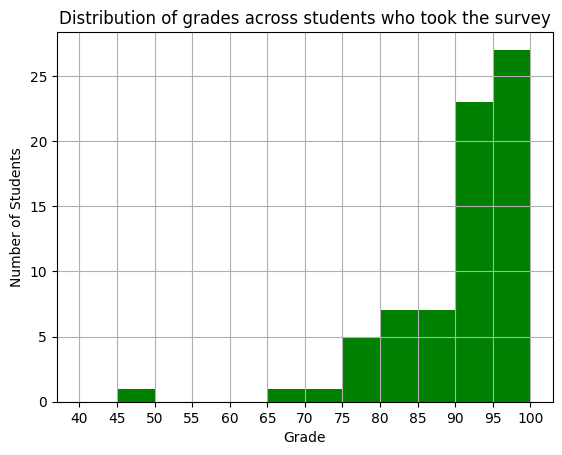

In [7]:
grade_bins = np.arange(np.min(grade_df['Grade'])-5,np.max(grade_df['Grade']+5),5)

plt.hist(grade_df['Grade'],bins=grade_bins,color='green');
plt.ylabel('Number of Students')
plt.xlabel('Grade')
plt.title('Distribution of grades across students who took the survey')
plt.xticks(grade_bins)
plt.grid()

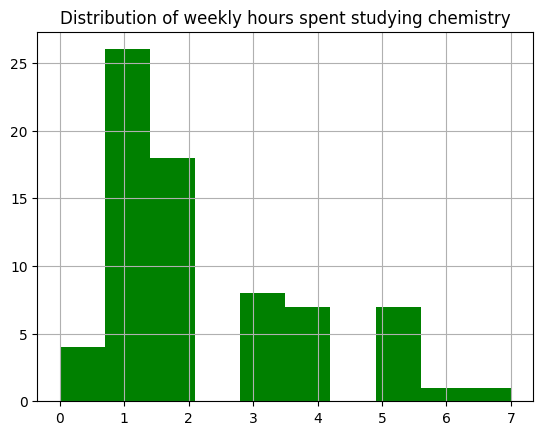

In [8]:
plt.hist(grade_df.iloc[:,1],color='green');
plt.title('Distribution of weekly hours spent studying chemistry')
plt.grid()

This distribution had a large outlier near 20, which was removed in earlier data cleaning 

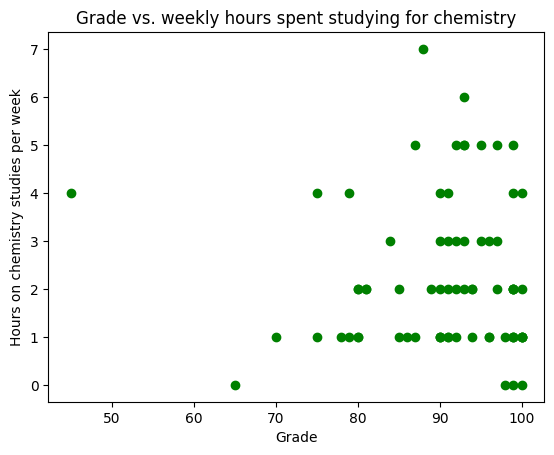

In [9]:
plt.scatter(grade_df.iloc[:,0],grade_df.iloc[:,1],color='green');
plt.xlabel('Grade')
plt.ylabel('Hours on chemistry studies per week')
plt.title('Grade vs. weekly hours spent studying for chemistry');

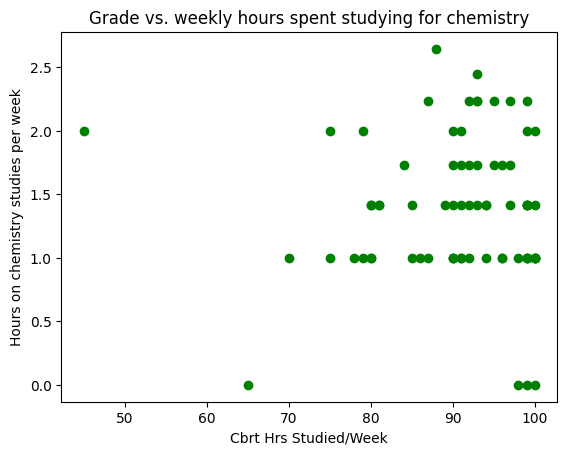

In [10]:
#Scatterplot using transformed hrs studied
plt.scatter(grade_df['Grade'],grade_df['Sqrt Hrs Studied/Week'],color='green');
plt.xlabel('Cbrt Hrs Studied/Week')
plt.ylabel('Hours on chemistry studies per week')
plt.title('Grade vs. weekly hours spent studying for chemistry');

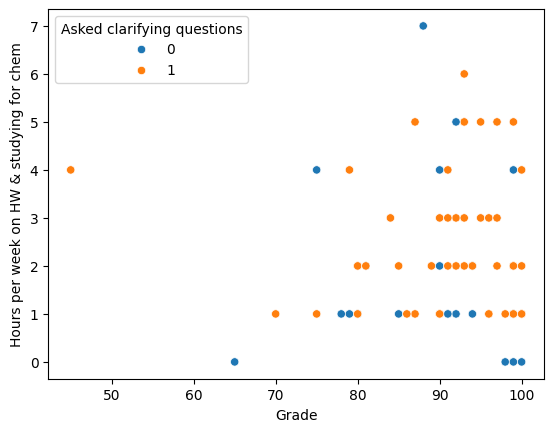

In [11]:
sns.scatterplot(data=grade_df,
                y='Hours per week on HW & studying for chem',
                x='Grade',
                hue='Asked clarifying questions');

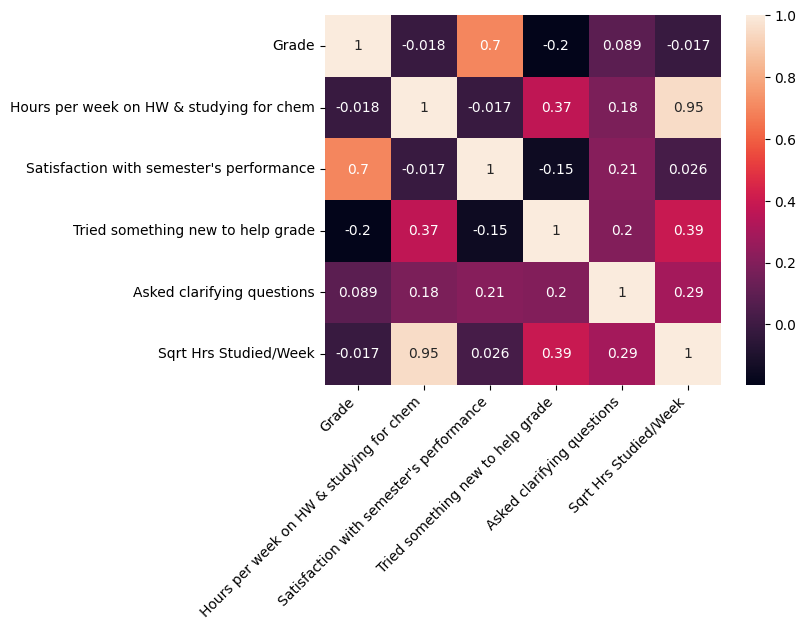

In [21]:
correlations_pd = grade_df.corr()
init_corr = sns.heatmap(correlations_pd,annot=True)
init_corr.set_xticklabels(init_corr.get_xticklabels(),rotation=45,
                         horizontalalignment='right');

## Model Generation

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [22]:
#define features and y values
features_df = grade_df.iloc[:,grade_df.columns != 'Grade']
features = features_df.values
y = grade_df['Grade']

### Model Selection Based on R2 Value and Effect of Random States

_Because of the size of the data set, there is a lot of stochasticity in
the model predictions depending on the random state of the split,
which is exemplified below<br>
A linear regression model and decision tree are used to predict outcomes from the data_

In [23]:
print('Decision Tree Cross Val Results Based on Random State: ')
states = np.arange(42,46)
total_scores = []
for state in states:
    #split train & test data with random state
    x_train, x_test, y_train, y_test = train_test_split(features,y,
                                                        test_size=.20,
                                                        random_state=state)
    print('random state ',state)
    #initialize and fit model
    model = DecisionTreeRegressor().fit(x_train,y_train)
    cross_vals = cross_val_score(model,x_train,y_train,cv=10)
    print('average cross val score across 10 folds: ',
          np.mean(cross_vals))
    total_scores.append(cross_vals)
    print()
print('r2 average: ',np.mean(total_scores))

Decision Tree Cross Val Results Based on Random State: 
random state  42
average cross val score across 10 folds:  -0.46895126987598557

random state  43
average cross val score across 10 folds:  -1.5305239313541708

random state  44
average cross val score across 10 folds:  -1.0175615269525635

random state  45
average cross val score across 10 folds:  -2.657236475349263

r2 average:  -1.418568300882996


In [24]:
print('Linear Regression Cross Val Results Based on Random State: ')
states = np.arange(42,46)
total_scores = []
for state in states:
    #split train & test data with random state
    x_train, x_test, y_train, y_test = train_test_split(features,y,
                                                        test_size=.2,
                                                        random_state=state)
    print('random state ',state)
    #initialize and fit model
    model = LinearRegression(fit_intercept=True).fit(x_train,y_train)
    cross_vals = cross_val_score(model,x_train,y_train,cv=10)
    print('average cross val score across 10 folds: ',
          np.mean(cross_vals))
    total_scores.append(cross_vals)
    print()
print('r2 average: ',np.mean(total_scores))

Linear Regression Cross Val Results Based on Random State: 
random state  42
average cross val score across 10 folds:  0.19334628360873957

random state  43
average cross val score across 10 folds:  -0.3736007043074218

random state  44
average cross val score across 10 folds:  -0.048111972252774124

random state  45
average cross val score across 10 folds:  -1.0031115542550577

r2 average:  -0.3078694868016285


_The linear regressor performed better overall so we will carry on with that model<br>
Both models, however, have very mediocre R2 values, so the model is very innacurate_

In [25]:
print('x train shape: ',x_train.shape)
print('y test shape: ',y_test.shape)
print('total data points ',grade_df.shape[0])

x train shape:  (57, 5)
y test shape:  (15,)
total data points  72


### Final Model Evaluation

In [26]:
y_pred = model.predict(x_test)
rmse_lm = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE : ',rmse_lm)

RMSE :  5.641256862646114


_An RMSE value of $5.64$ indicates that the predictions are decent for this model, but not great_

## Implementing Model for Grade Prediction

_Here, I will generate some data to show my students effort they should put in to yield a satisfactory grade for high school chemistry_<br>
_The categories I will be manipulating are:_ 
- Hours per week on HW & studying for chem
- Asked clarifying questions

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features,y,
                                                    test_size=.2,
                                                    random_state=42)

model = LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [28]:
grade_predict_input = np.array([2,2,0,1,1.4])

#Reminder of model features
for col, val in zip(features_df.columns.values,grade_predict_input):
    print(col,end='')
    print(": ",val)
    
grade_predict_output = model.predict(grade_predict_input.reshape(1,-1))
print()
print(f'predicted grade range {grade_predict_output-rmse_lm} - {grade_predict_output+rmse_lm}')

Hours per week on HW & studying for chem:  2.0
Satisfaction with semester's performance:  2.0
Tried something new to help grade:  0.0
Asked clarifying questions:  1.0
Sqrt Hrs Studied/Week:  1.4

predicted grade range [76.94029619] - [88.22280991]


_Methods and results are outlined in the README_